This notebook shows the creation process of a grid system for the advanced routing system.

In [1]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon
import osmnx as ox
import matplotlib.pyplot as plt

# Step 1: Define the bounding box for Accra and grid resolution
minx, miny = -0.23, 5.47
maxx, maxy = -0.02, 5.89
grid_size = 0.0001  # Approx 10m for latitude/longitude in Accra


In [2]:
# Generate the grid cells
x_coords = np.arange(minx, maxx, grid_size)
y_coords = np.arange(miny, maxy, grid_size)
grid_cells = [Polygon([(x, y), (x + grid_size, y), (x + grid_size, y + grid_size), (x, y + grid_size)]) for x in x_coords for y in y_coords]
# Create a GeoDataFrame for the grid
grid_gdf = gpd.GeoDataFrame(grid_cells, columns=['geometry'])


In [3]:
# Step 2: Download land use data with OSMnx
# Download building footprints
buildings = ox.geometries_from_bbox(maxy, miny, maxx, minx, tags={'building': True})

# Download roads
roads = ox.geometries_from_bbox(maxy, miny, maxx, minx, tags={'highway': True})

# Download parks and green spaces
parks = ox.geometries_from_bbox(maxy, miny, maxx, minx, tags={'leisure': 'park'})

/var/folders/g1/_5ywfh994dvfccvkj4cn_wy00000gp/T/ipykernel_23046/1015688977.py:3: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = ox.geometries_from_bbox(maxy, miny, maxx, minx, tags={'building': True})
/Users/tg1523/anaconda3/envs/drone_env/lib/python3.11/site-packages/osmnx/geometries.py:48: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  return features.features_from_bbox(north, south, east, west, tags=tags)
/Users/tg1523/anaconda3/envs/drone_env/lib/python3.11/site-packages/osmnx/geometri

/Users/tg1523/anaconda3/envs/drone_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


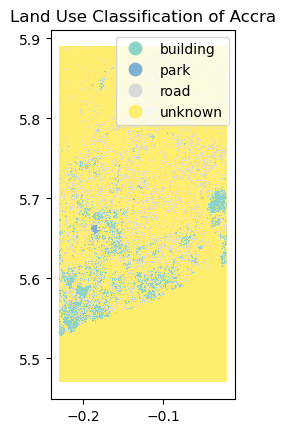

In [4]:
# Step 3: Assign land use attributes to grid cells

# Initialize land use categories
grid_gdf['land_use'] = 'unknown'

# Check if each grid cell intersects with buildings, roads, or parks
for idx, cell in grid_gdf.iterrows():
    if buildings.intersects(cell['geometry']).any():
        grid_gdf.at[idx, 'land_use'] = 'building'
    elif roads.intersects(cell['geometry']).any():
        grid_gdf.at[idx, 'land_use'] = 'road'
    elif parks.intersects(cell['geometry']).any():
        grid_gdf.at[idx, 'land_use'] = 'park'

# Step 4: Save the grid for future use
grid_gdf.to_file('../map/accra_fine_grid_with_land_use.geojson', driver='GeoJSON')

# Optional: Visualize the grid with land use categories
grid_gdf.plot(column='land_use', cmap='Set3', legend=True)
plt.title("Land Use Classification of Accra")
plt.show()
